Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180
seed = 123

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation" ,## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

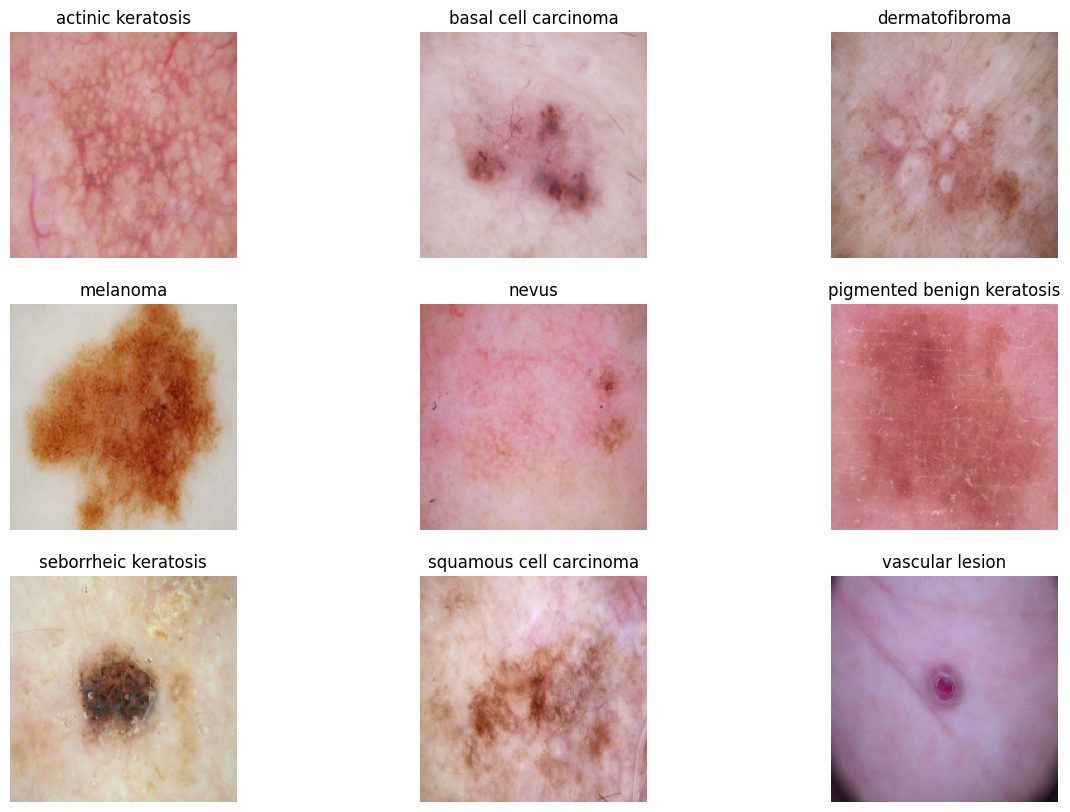

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
def plot_one_instance_per_class(dataset, class_names):
    plt.figure(figsize=(15, 10))
    class_found = [False] * len(class_names)

    for images, labels in dataset.unbatch():
        label = labels.numpy()
        if not class_found[label]:
            plt.subplot(3, 3, label + 1)
            plt.imshow(images.numpy().astype("uint8"))
            plt.title(class_names[label])
            plt.axis("off")
            class_found[label] = True

        if all(class_found):
            break

# Visualize one instance of each class
plot_one_instance_per_class(train_ds, train_ds.class_names)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
import tensorflow as tf
from tensorflow.keras import layers, models


input_shape = (180, 180, 3)

# CNN Model
model = models.Sequential([
    # Normalization layer
    layers.Rescaling(1./255, input_shape=input_shape),

    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),

    # Output layer with 9 classes
    layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 701s 224ms/step - accuracy: 0.1707 - loss: 2.2151 - val_accuracy: 0.2796 - val_loss: 1.9313
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.2739 - loss: 1.9583 - val_accuracy: 0.3669 - val_loss: 1.6744
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.3769 - loss: 1.6825 - val_accuracy: 0.4564 - val_loss: 1.5426
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4765 - loss: 1.5106 - val_accuracy: 0.4922 - val_loss: 1.4437
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.4923 - loss: 1.4392 - val_accuracy: 0.4765 - val_loss: 1.4504
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5319 - loss: 1.3116 - val_accuracy: 0.5503 - val_loss: 1.2538
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.5571 - loss: 1.2976 - val_accuracy: 0.5705 - val_loss: 1.2201
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5753 - loss: 1.2217 - val_accuracy: 0.6152 

### Visualizing training results

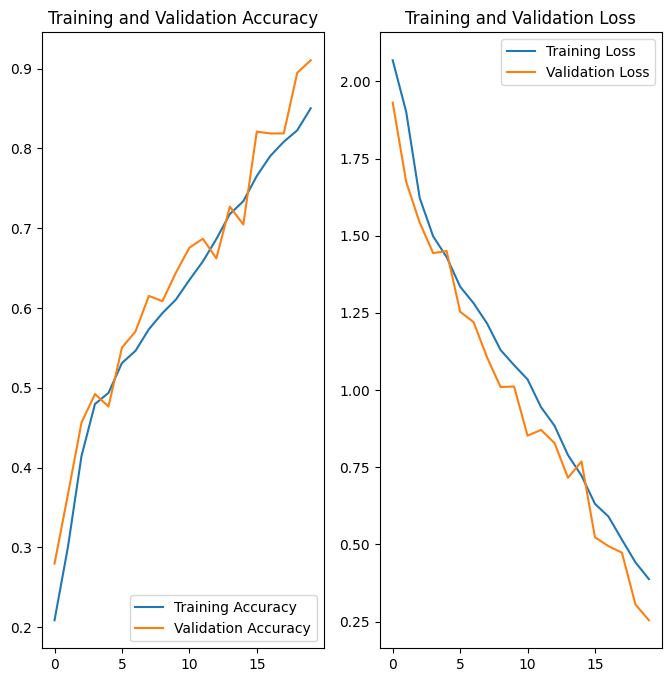

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### As can be seen from the graphs, the data is overfitting on the train set and thus performing poorly on the test set. The training accuracy is increasing over time however, the validation accuracy is consistent after a certain range (moving up and down). Also, the training loss has reduced over epochs, however, validation loss is really high.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [16]:
!pip install Augmentor

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
path_to_training_dataset = data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5FAC1CA010>: 100%|██████████| 500/500 [00:22<00:00, 21.81 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5FA0600F50>: 100%|██████████| 500/500 [00:20<00:00, 24.88 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5FA0704D90>: 100%|██████████| 500/500 [00:18<00:00, 26.79 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5FAC34B710>: 100%|██████████| 500/500 [01:23<00:00,  5.98 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5FAF9AD2D0>: 100%|██████████| 500/500 [01:14<00:00,  6.74 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5FAC25AB90>: 100%|██████████| 500/500 [00:18<00:00, 26.49 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5FAC37FD10>: 100%|██████████| 500/500 [00:40<00:00, 12.28 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F60598A9510>: 100%|██████████| 500/500 [00:18<00:00, 26.59 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F5FAC387F50>: 100%|██████████| 500/500 [00:20<00:00, 24.77 Samples/s]


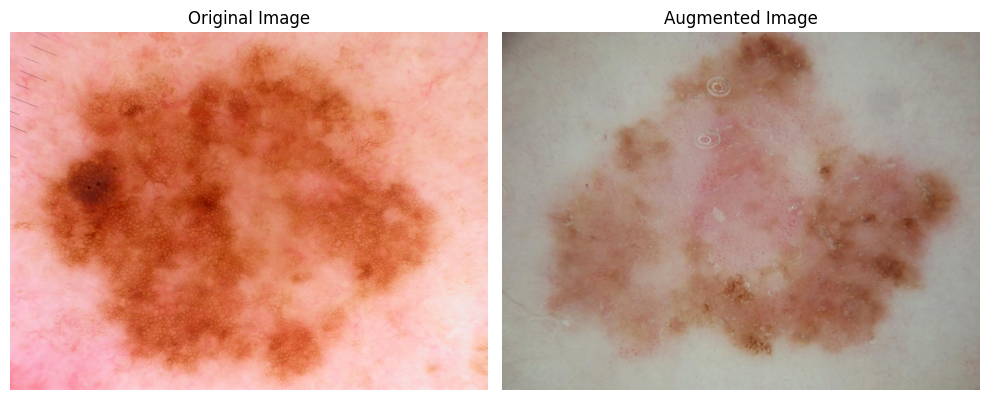

In [90]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
import cv2

# Path to original and augmented images
original_path = os.path.join(data_dir_train, 'melanoma')  # Replace 'Class_Name' with the actual class
augmented_path = os.path.join(original_path, 'output')

# Load original and augmented images
original_images = [img for img in os.listdir(original_path) if img.lower().endswith(('png', 'jpg', 'jpeg'))]
augmented_images = os.listdir(augmented_path)

# Select one original and one augmented image
original_img_path = os.path.join(original_path, original_images[5])
augmented_img_path = os.path.join(augmented_path, augmented_images[20])

# Read images
original_img = cv2.imread(original_img_path)
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

augmented_img = cv2.imread(augmented_img_path)
augmented_img = cv2.cvtColor(augmented_img, cv2.COLOR_BGR2RGB)

# Plot side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')

# Augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_img)
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

### Tried checking few example of images, we can see here, that the original image is zoomed here  after augmentation

In [19]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [21]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train,'*', '*.jpg'))]
print(len(path_list))
path_list

2239


['/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000027.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000021.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000038.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000023.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000032.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000025.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000028.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000039.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000024.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000037.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000034.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus

In [22]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(path_list_new))
path_list_new

4500


['/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0000079.jpg_dc74f10b-004d-4f06-b73a-c219b5b5def3.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0024511.jpg_b57cf28b-818d-4eb5-b899-07917da962c1.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0000422.jpg_8860b5b0-810d-478b-a58f-106ea0674c27.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0028063.jpg_60b5be23-2adc-44a8-a571-a7751aa9b8c0.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0028370.jpg_5fd6d0fb-a1a0-4fd9-9485-d3aa07e685e6.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0000368.jpg_975ca488-1ec2-4d89-a922-3b9f18cffe3d.jpg',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0000025.jpg_646ccbe

In [23]:
lesion_list = [
    os.path.basename(os.path.dirname(y))  # Extract class folder names (class names)
    for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))  # Match .jpg images in class folders
]
print(len(lesion_list))
lesion_list


2239


['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [24]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',
 'nevus',


In [25]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
dataframe_dict_original

{'/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000027.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000021.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000038.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000023.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000032.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000025.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000028.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000039.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000024.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/ISIC_0000037.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/

In [26]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict_new

{'/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0000079.jpg_dc74f10b-004d-4f06-b73a-c219b5b5def3.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0024511.jpg_b57cf28b-818d-4eb5-b899-07917da962c1.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0000422.jpg_8860b5b0-810d-478b-a58f-106ea0674c27.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0028063.jpg_60b5be23-2adc-44a8-a571-a7751aa9b8c0.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0028370.jpg_5fd6d0fb-a1a0-4fd9-9485-d3aa07e685e6.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Train/nevus/output/nevus_original_ISIC_0000368.jpg_975ca488-1ec2-4d89-a922-3b9f18cffe3d.jpg': 'nevus',
 '/content/gdrive/My Drive/Colab_Notebooks/CNN_Folder/Trai

In [27]:
pd.set_option('display.max_colwidth', None)
original_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)
new_df = pd.concat([original_df, df2], ignore_index=True)

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [28]:
original_df['Label'].value_counts()

,count
Label,
nevus,500
actinic keratosis,500
melanoma,500
basal cell carcinoma,500
squamous cell carcinoma,500
seborrheic keratosis,500
vascular lesion,500
pigmented benign keratosis,500
dermatofibroma,500


In [29]:
new_df['Label'].value_counts()

,count
Label,
nevus,1000
actinic keratosis,1000
melanoma,1000
basal cell carcinoma,1000
squamous cell carcinoma,1000
seborrheic keratosis,1000
vascular lesion,1000
pigmented benign keratosis,1000
dermatofibroma,1000


#### **Todo:** Create a training dataset

In [30]:
batch_size = 32
img_height = 180
img_width = 180

In [31]:
train_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.


#### **Todo:** Create a validation dataset

In [32]:
val_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation" ,## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Todo:
### Create the model, compile and train the model


In [33]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = models.Sequential([
    # Normalization layer
    layers.Rescaling(1./255, input_shape=input_shape),

    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # Dropout layer to reduce overfitting

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),  # Increase dropout rate as layers deepen

    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Heavier dropout in dense layers

    # Output layer with 9 classes
    layers.Dense(9, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [34]:
## Your code goes here
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

#### **Todo**: Train the model on the data created using Augmentor

## Need to create the new training data set, test set remains the same

In [35]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
    train_ds_augmented,
    validation_data=val_ds_augmented,
    epochs=20,  # Adjust epochs based on your dataset
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]  # Optional for early stopping
)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 62s 265ms/step - accuracy: 0.1667 - loss: 2.4197 - val_accuracy: 0.3504 - val_loss: 1.7385
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 52s 249ms/step - accuracy: 0.2943 - loss: 1.7711 - val_accuracy: 0.4150 - val_loss: 1.5276
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 80s 240ms/step - accuracy: 0.3842 - loss: 1.6086 - val_accuracy: 0.4759 - val_loss: 1.4024
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 79s 228ms/step - accuracy: 0.4211 - loss: 1.5065 - val_accuracy: 0.5323 - val_loss: 1.2974
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 48s 229ms/step - accuracy: 0.4661 - loss: 1.4122 - val_accuracy: 0.5063 - val_loss: 1.3161
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 81s 223ms/step - accuracy: 0.4711 - loss: 1.3629 - val_accuracy: 0.5316 - val_loss: 1.2542
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 230ms/step - accuracy: 0.4953 - loss: 1.2982 - val_accuracy: 0.6214 - val_loss: 1.0484
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 84s 239ms/step - accuracy: 0.5227 - loss: 1

### Visualizing the results

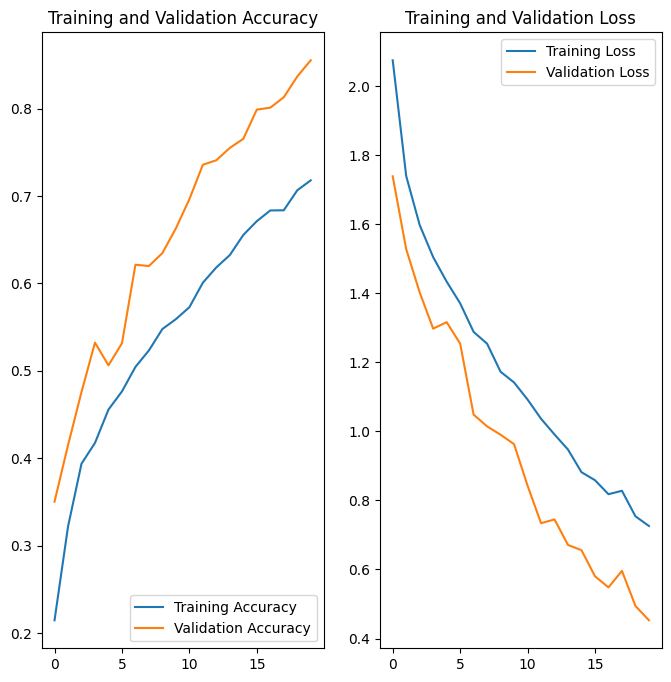

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
### This is a comparatively better model as we can see, here accuracy increases post each epoch, and gradual decrease in loss is there for both training and validation dataset. This is a more generalized model, capable of detecting melanoma more accurately

In [37]:
## Your code goes here.
original_df['Label'].value_counts()

,count
Label,
nevus,500
actinic keratosis,500
melanoma,500
basal cell carcinoma,500
squamous cell carcinoma,500
seborrheic keratosis,500
vascular lesion,500
pigmented benign keratosis,500
dermatofibroma,500


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### As far as I could see, there are equal number of images in each folder/ i.e. class therefore no class imbalance
#### - Which classes dominate the data in terms proportionate number of samples?


# Note: Already class imbalance, or over sampling done above using Augmentor.

### Lets see the distribution of augmented data after adding new images to the original training data.

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [ ]:
# data_dir_train="path to directory with training data + data created using augmentor"
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split = 0.2,
#   subset = ## Todo choose the correct parameter value, so that only training data is refered to,,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir_train,
#   seed=123,
#   validation_split = 0.2,
#   subset = ## Todo choose the correct parameter value, so that only validation data is refered to,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

#### **Todo:** Create your model (make sure to include normalization)

In [38]:
## your code goes here
model = models.Sequential([
    # Input Layer & Normalization
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # First Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),  # Dropout added here

    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.4),  # Increased dropout

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Dropout before output layer

    # Output Layer (9 classes, assuming softmax activation for multi-class classification)
    layers.Dense(9, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [39]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if labels are one-hot encoded
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,957,449 (60.87 MB)

 Trainable params: 15,956,489 (60.87 MB)

 Non-trainable params: 960 (3.75 KB)

#### **Todo:**  Train your model

### For epochs 50 it fails, hence keeping it around 25 -- first iteration
### Decided to keep early stopping and change epochs_range = range(len(acc)) in the plotting code

In [40]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds_augmented,
    validation_data=val_ds_augmented,
    epochs=epochs,  # Adjust epochs based on your dataset
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]  # Optional for early stopping
)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 70s 282ms/step - accuracy: 0.3456 - loss: 2.1500 - val_accuracy: 0.1774 - val_loss: 8.7170
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 61s 219ms/step - accuracy: 0.4819 - loss: 1.4625 - val_accuracy: 0.1106 - val_loss: 5.6694
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 84s 228ms/step - accuracy: 0.5755 - loss: 1.1689 - val_accuracy: 0.4076 - val_loss: 1.8971
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 80s 217ms/step - accuracy: 0.6532 - loss: 0.9364 - val_accuracy: 0.4165 - val_loss: 3.0827
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 49s 231ms/step - accuracy: 0.6925 - loss: 0.8350 - val_accuracy: 0.6578 - val_loss: 1.2677
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 81s 225ms/step - accuracy: 0.7344 - loss: 0.7159 - val_accuracy: 0.4239 - val_loss: 1.9956
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 84s 237ms/step - accuracy: 0.7337 - loss: 0.7187 - val_accuracy: 0.7847 - val_loss: 0.6201
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 81s 230ms/step - accuracy: 0.8155 - loss: 0

### Either we have to comment out callbacks or in the next code we have to put epochs_range = range(len(acc) as per requirement. However, as mentioned to use epochs 50, therefore, I commented the callbacks part

#### **Todo:**  Visualize the model results

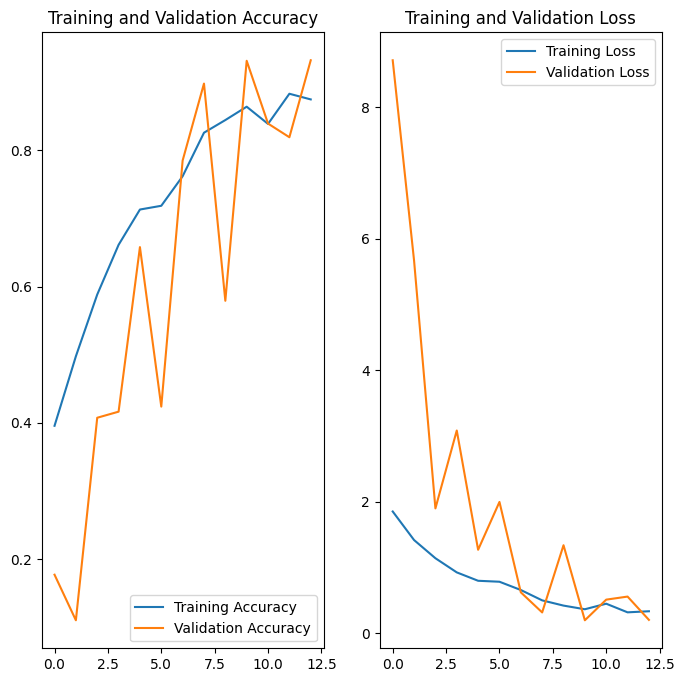

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc)) # Changed this to len(acc) because we are using callbacks early stopping, so if the results are better before 50 this code wont fail

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
Note: I had run two iterations. The rebalancing did help in the first iteration, then had to rerun due to T4 GPU disconnectivity. THis time the results were kind of okay from the initial part onwards and then still shows some overfitting till the end. as can be seen with test dataset which separated from the early onwards.


In [42]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 118 files belonging to 9 classes.


In [44]:
test_loss, test_acc = model.evaluate(test_ds)



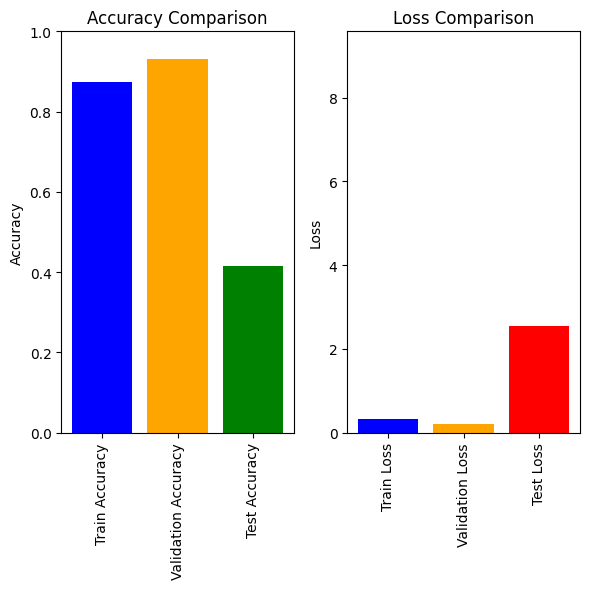

In [46]:
# Plot results
plt.figure(figsize=(6, 6))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Validation Accuracy', 'Test Accuracy'],
        [history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_acc],
        color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=90)
plt.tight_layout()

# Loss Bar Chart
plt.subplot(1, 2, 2)
plt.bar(['Train Loss', 'Validation Loss', 'Test Loss'],
        [history.history['loss'][-1], history.history['val_loss'][-1], test_loss],
        color=['blue', 'orange', 'red'])
plt.ylim(0, max(history.history['loss'] + history.history['val_loss'] + [test_loss]) * 1.1)

plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plots
plt.show()

## As can be seen again, that there is still overfitting, methods can be leveraged such as higher drop outs, or more augmented images. It also depends on what type of images are captured. etc. However, this is going to be the normal process for a full CNN project to predict Melanoma.

### Therefore I feel, the model without normalization is the one we should proceed with as this might be underfitting the model by margins as can be seen from the train and validation graph.

In [47]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = models.Sequential([
    # Normalization layer
    layers.Rescaling(1./255, input_shape=input_shape),

    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # Dropout layer to reduce overfitting

    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),  # Increase dropout rate as layers deepen

    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    # Flatten layer
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Heavier dropout in dense layers

    # Output layer with 9 classes
    layers.Dense(9, activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
## your code goes here
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use categorical_crossentropy if labels are one-hot encoded
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
history = model.fit(
    train_ds_augmented,
    validation_data=val_ds_augmented,
    epochs=20,  # Adjust epochs based on your dataset
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]  # Optional for early stopping
)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 63s 259ms/step - accuracy: 0.1281 - loss: 2.5051 - val_accuracy: 0.2042 - val_loss: 2.0917
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 68s 222ms/step - accuracy: 0.2281 - loss: 2.0216 - val_accuracy: 0.4105 - val_loss: 1.5686
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 85s 238ms/step - accuracy: 0.3771 - loss: 1.6138 - val_accuracy: 0.4662 - val_loss: 1.4601
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 81s 233ms/step - accuracy: 0.4312 - loss: 1.4667 - val_accuracy: 0.4826 - val_loss: 1.3549
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 80s 225ms/step - accuracy: 0.4700 - loss: 1.3863 - val_accuracy: 0.5612 - val_loss: 1.1728
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 84s 233ms/step - accuracy: 0.5057 - loss: 1.2808 - val_accuracy: 0.5768 - val_loss: 1.1609
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 81s 231ms/step - accuracy: 0.5234 - loss: 1.2256 - val_accuracy: 0.5657 - val_loss: 1.1098
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 50s 236ms/step - accuracy: 0.5536 - loss: 1

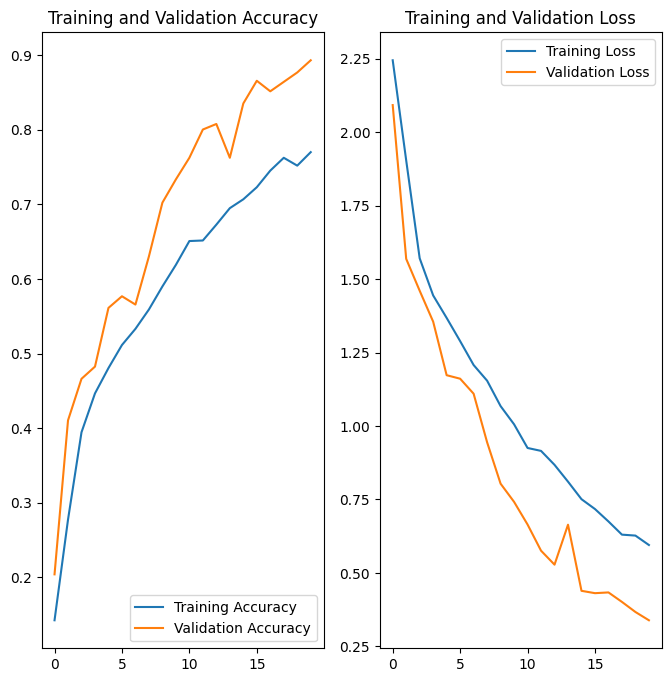

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20) # Changed this to len(acc) because we are using callbacks early stopping, so if the results are better before 50 this code wont fail

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3544 - loss: 4.2549


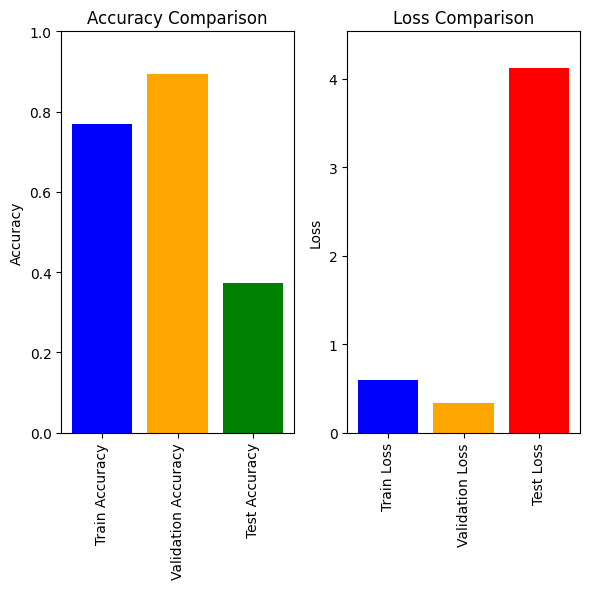

In [51]:
test_loss, test_acc = model.evaluate(test_ds)

# Plot results
plt.figure(figsize=(6, 6))

# Accuracy Bar Chart
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Validation Accuracy', 'Test Accuracy'],
        [history.history['accuracy'][-1], history.history['val_accuracy'][-1], test_acc],
        color=['blue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=90)
plt.tight_layout()

# Loss Bar Chart
plt.subplot(1, 2, 2)
plt.bar(['Train Loss', 'Validation Loss', 'Test Loss'],
        [history.history['loss'][-1], history.history['val_loss'][-1], test_loss],
        color=['blue', 'orange', 'red'])
plt.ylim(0, max(history.history['loss'] + history.history['val_loss'] + [test_loss]) * 1.1)

plt.ylabel('Loss')
plt.title('Loss Comparison')
plt.xticks(rotation=90)
plt.tight_layout()

# Show plots
plt.show()

## Although there is still test loss which is higher, this is a better model because there is not much drastic change per epoch when plotting the train and val ds loss and accuracy graph side by side. Hence it is better to go with the model without the normalization.

In [54]:
!python --version

Python 3.11.11


In [57]:
!pip list | grep tensorflow

tensorflow                         2.18.0
tensorflow-datasets                4.9.8
tensorflow-hub                     0.16.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.16.1
tensorflow-probability             0.25.0
tensorflow-text                    2.18.1


In [58]:
!pip list | grep keras

keras                              3.8.0
keras-hub                          0.18.1
keras-nlp                          0.18.1
tf_keras                           2.18.0
